In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

---
## 1. Load Data

In [3]:
# กำหนด Path
DATA_PATH = '../data/raw/'

# โหลดข้อมูลหลัก
app_train = pd.read_csv(DATA_PATH + 'application_train.csv')
app_test = pd.read_csv(DATA_PATH + 'application_test.csv')

print(f"Train shape: {app_train.shape}")
print(f"Test shape: {app_test.shape}")

Train shape: (307511, 122)
Test shape: (48744, 121)


In [4]:
# ดูตัวอย่างข้อมูล
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

---
## 2. Data Structure Inspection

In [5]:
# ตรวจสอบ Data Types
print("=" * 50)
print("DATA TYPES SUMMARY")
print("=" * 50)
print(app_train.dtypes.value_counts())
print("\n")
app_train.info()

DATA TYPES SUMMARY
float64    65
int64      41
object     16
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# แยกประเภท Columns
numeric_cols = app_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = app_train.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numeric columns: 106
Categorical columns: 16


In [8]:
# ตรวจสอบ Duplicates
duplicates = app_train.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# ตรวจสอบ SK_ID_CURR ซ้ำ
id_duplicates = app_train['SK_ID_CURR'].duplicated().sum()
print(f"Duplicate SK_ID_CURR: {id_duplicates}")

Duplicate rows: 0
Duplicate SK_ID_CURR: 0


---
## 3. Missing Values Analysis

In [9]:
# คำนวณ Missing Values
def missing_values_table(df):
    """สร้างตาราง Missing Values"""
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total'})
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] > 0]
    mis_val_table = mis_val_table.sort_values('% of Total', ascending=False).round(2)
    print(f"Total columns with missing values: {len(mis_val_table)} / {df.shape[1]}")
    return mis_val_table

missing_df = missing_values_table(app_train)
missing_df.head(20)

Total columns with missing values: 67 / 122


,Missing Values,% of Total
COMMONAREA_MEDI,214865,69.87
COMMONAREA_MODE,214865,69.87
COMMONAREA_AVG,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_MODE,210199,68.35


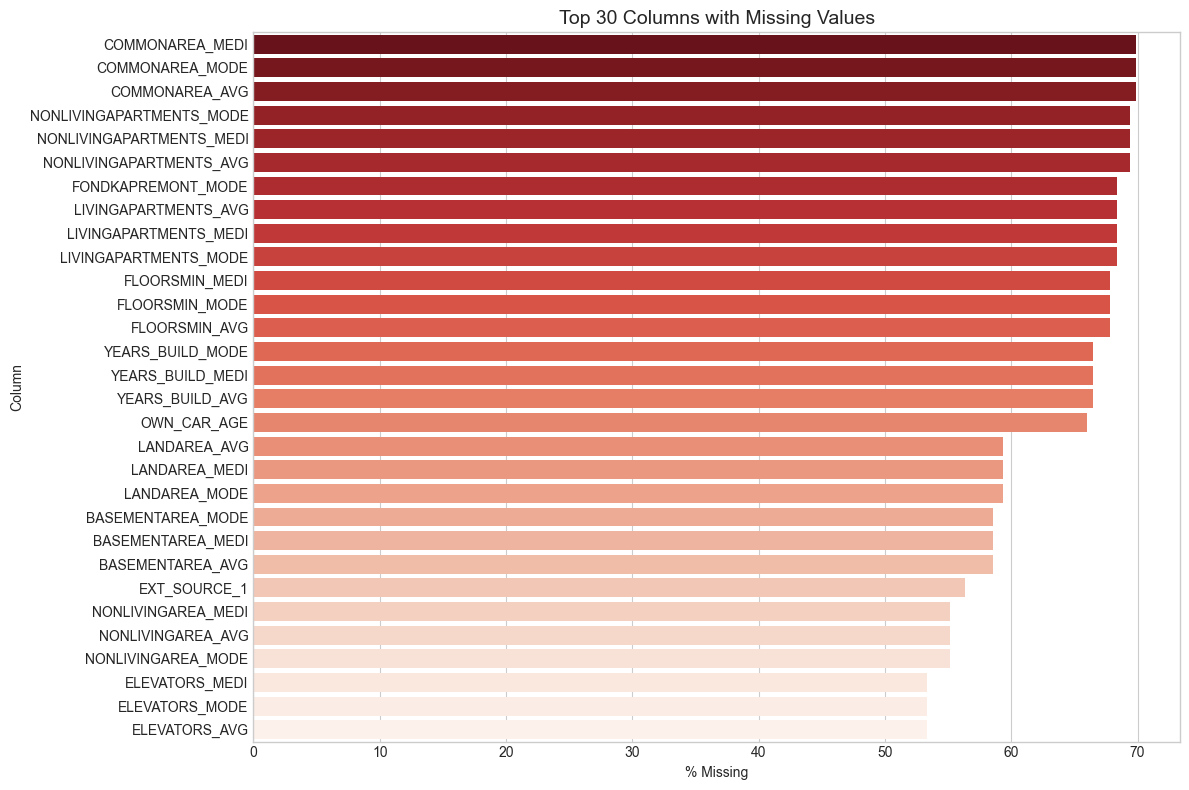

In [10]:
# Visualize Missing Values (Top 30)
plt.figure(figsize=(12, 8))
top_missing = missing_df.head(30)
sns.barplot(x=top_missing['% of Total'], y=top_missing.index, palette='Reds_r')
plt.title('Top 30 Columns with Missing Values', fontsize=14)
plt.xlabel('% Missing')
plt.ylabel('Column')
plt.tight_layout()
plt.show()

---
## 4. Target Variable Analysis (Class Imbalance)

In [11]:
# Distribution of TARGET
target_counts = app_train['TARGET'].value_counts()
target_pct = app_train['TARGET'].value_counts(normalize=True) * 100

print("TARGET Distribution:")
print(f"  0 (No Default): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"  1 (Default):    {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\nImbalance Ratio: {target_counts[0] / target_counts[1]:.2f} : 1")

TARGET Distribution:
  0 (No Default): 282,686 (91.93%)
  1 (Default):    24,825 (8.07%)

Imbalance Ratio: 11.39 : 1


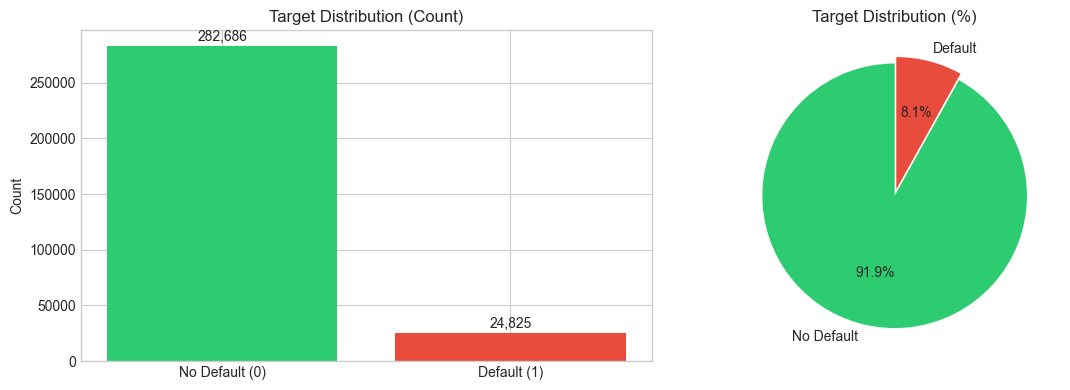

In [12]:
# Visualize Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar Chart
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['No Default (0)', 'Default (1)'], target_counts.values, color=colors)
axes[0].set_title('Target Distribution (Count)', fontsize=12)
axes[0].set_ylabel('Count')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontsize=10)

# Pie Chart
axes[1].pie(target_counts.values, labels=['No Default', 'Default'], autopct='%1.1f%%', 
            colors=colors, explode=(0, 0.05), startangle=90)
axes[1].set_title('Target Distribution (%)', fontsize=12)

plt.tight_layout()
plt.show()

---
## 5. Outlier Detection

In [13]:
# ตรวจสอบ DAYS_EMPLOYED (Anomaly ที่รู้จัก: 365243)
print("DAYS_EMPLOYED Statistics:")
print(app_train['DAYS_EMPLOYED'].describe())
print(f"\nMax value: {app_train['DAYS_EMPLOYED'].max()}")
print(f"Rows with 365243: {(app_train['DAYS_EMPLOYED'] == 365243).sum()}")

DAYS_EMPLOYED Statistics:
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Max value: 365243
Rows with 365243: 55374


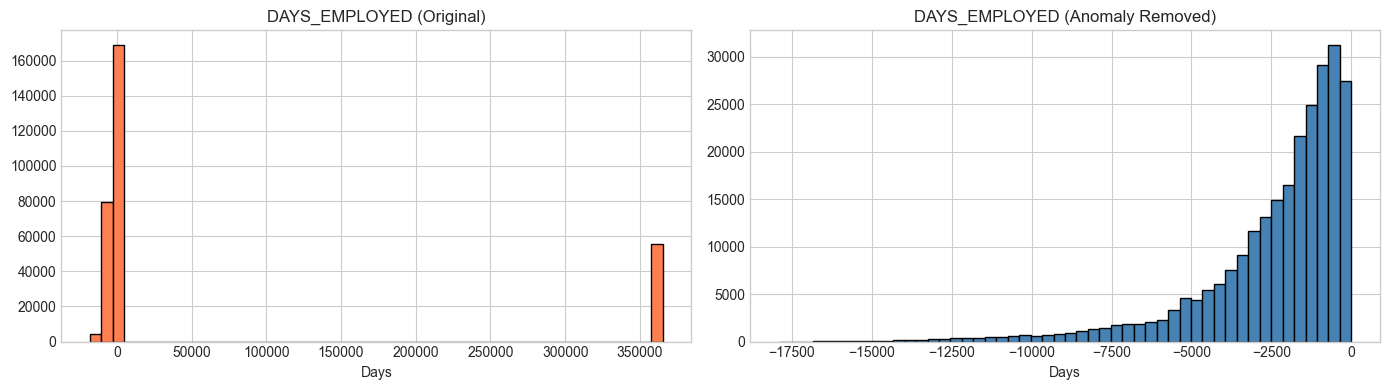

In [14]:
# Visualize DAYS_EMPLOYED anomaly
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Before fixing
axes[0].hist(app_train['DAYS_EMPLOYED'], bins=50, color='coral', edgecolor='black')
axes[0].set_title('DAYS_EMPLOYED (Original)', fontsize=12)
axes[0].set_xlabel('Days')

# After fixing (exclude anomaly)
days_employed_clean = app_train[app_train['DAYS_EMPLOYED'] != 365243]['DAYS_EMPLOYED']
axes[1].hist(days_employed_clean, bins=50, color='steelblue', edgecolor='black')
axes[1].set_title('DAYS_EMPLOYED (Anomaly Removed)', fontsize=12)
axes[1].set_xlabel('Days')

plt.tight_layout()
plt.show()

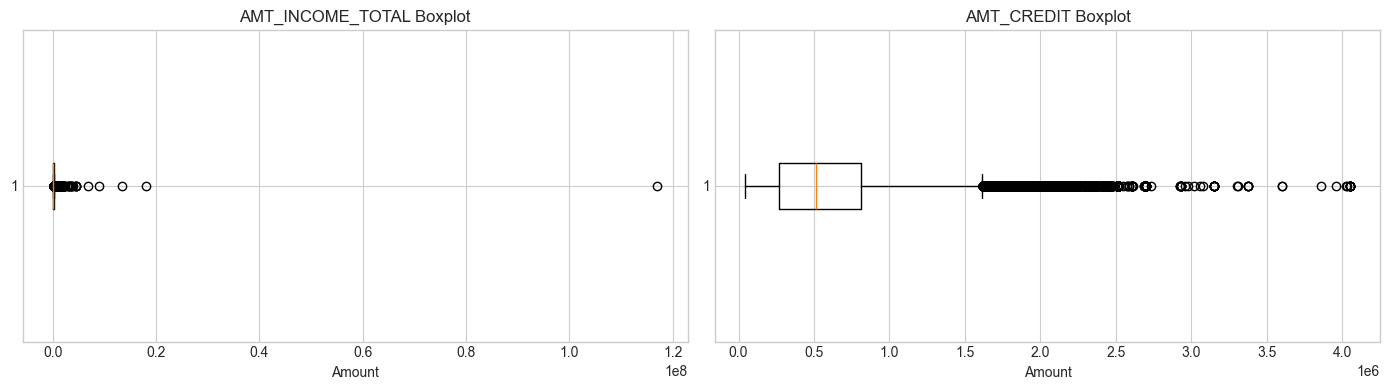

In [15]:
# ตรวจสอบ Outliers ใน AMT_INCOME_TOTAL และ AMT_CREDIT
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# AMT_INCOME_TOTAL
axes[0].boxplot(app_train['AMT_INCOME_TOTAL'], vert=False)
axes[0].set_title('AMT_INCOME_TOTAL Boxplot', fontsize=12)
axes[0].set_xlabel('Amount')

# AMT_CREDIT
axes[1].boxplot(app_train['AMT_CREDIT'], vert=False)
axes[1].set_title('AMT_CREDIT Boxplot', fontsize=12)
axes[1].set_xlabel('Amount')

plt.tight_layout()
plt.show()

In [16]:
# สรุป Outliers สำหรับ Numeric Columns หลัก
key_numeric = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

for col in key_numeric:
    Q1 = app_train[col].quantile(0.25)
    Q3 = app_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((app_train[col] < lower) | (app_train[col] > upper)).sum()
    print(f"{col}: {outliers:,} outliers ({outliers/len(app_train)*100:.2f}%)")

AMT_INCOME_TOTAL: 14,035 outliers (4.56%)
AMT_CREDIT: 6,562 outliers (2.13%)
AMT_ANNUITY: 7,504 outliers (2.44%)
AMT_GOODS_PRICE: 14,728 outliers (4.79%)


---
## 6. Correlation Analysis

In [17]:
# Correlation กับ TARGET
correlations = app_train.corr(numeric_only=True)['TARGET'].drop('TARGET').sort_values()

print("Top 10 Positive Correlations with TARGET:")
print(correlations.tail(10))
print("\nTop 10 Negative Correlations with TARGET:")
print(correlations.head(10))

Top 10 Positive Correlations with TARGET:
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
Name: TARGET, dtype: float64

Top 10 Negative Correlations with TARGET:
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


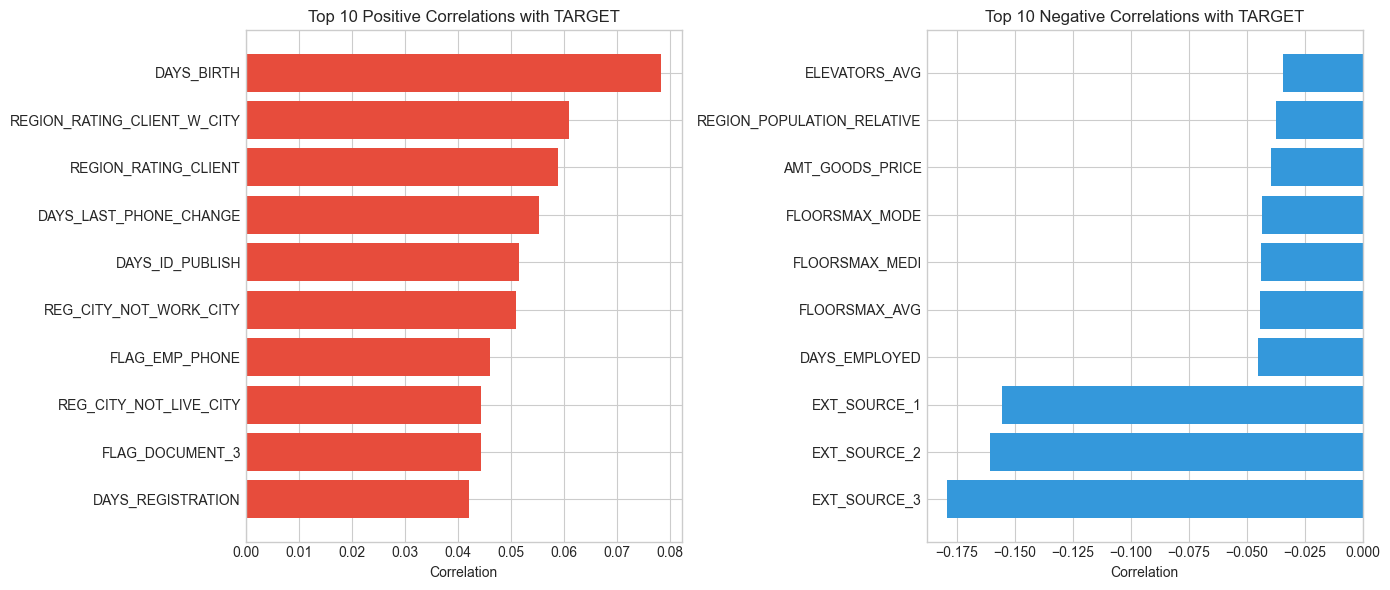

In [18]:
# Visualize Top Correlations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive
top_pos = correlations.tail(10)
axes[0].barh(top_pos.index, top_pos.values, color='#e74c3c')
axes[0].set_title('Top 10 Positive Correlations with TARGET', fontsize=12)
axes[0].set_xlabel('Correlation')

# Negative
top_neg = correlations.head(10)
axes[1].barh(top_neg.index, top_neg.values, color='#3498db')
axes[1].set_title('Top 10 Negative Correlations with TARGET', fontsize=12)
axes[1].set_xlabel('Correlation')

plt.tight_layout()
plt.show()

---
## 7. Categorical Features Analysis

In [19]:
# วิเคราะห์ Categorical Features หลัก
key_categorical = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                   'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']

for col in key_categorical:
    print(f"\n{'='*50}")
    print(f"{col}")
    print(f"{'='*50}")
    print(app_train[col].value_counts())


NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

CODE_GENDER
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

FLAG_OWN_CAR
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

FLAG_OWN_REALTY
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

NAME_INCOME_TYPE
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

NAME_EDUCATION_TYPE
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

NAME_FAMILY_STATUS
NAME_FAMILY_STATUS
Married        

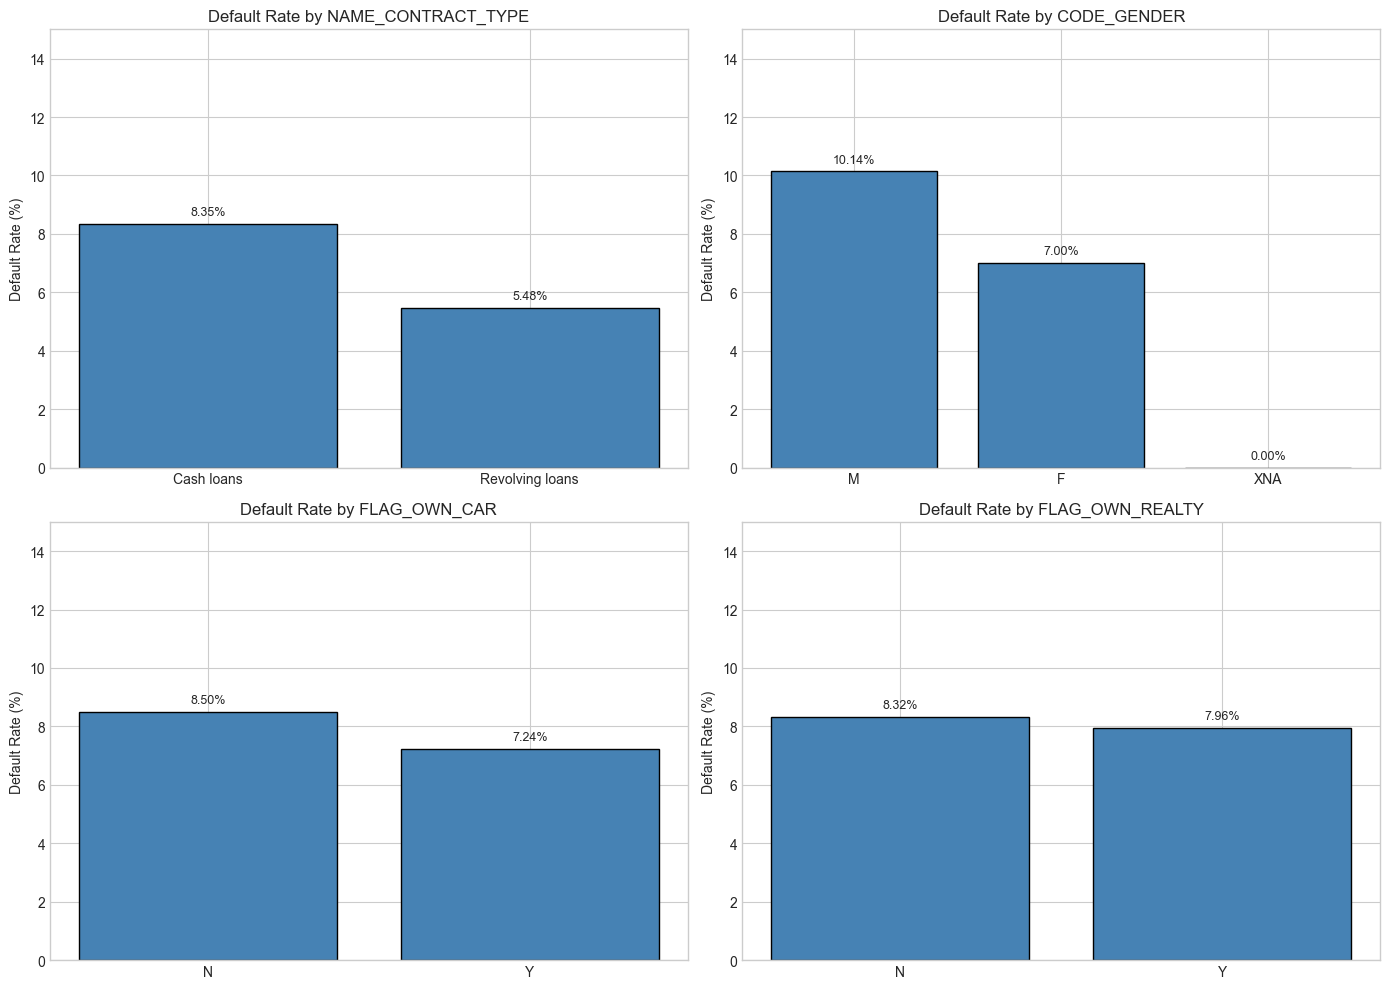

In [20]:
# Default Rate by Categorical Features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, col in zip(axes.flatten(), ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']):
    default_rate = app_train.groupby(col)['TARGET'].mean().sort_values(ascending=False)
    bars = ax.bar(default_rate.index, default_rate.values * 100, color='steelblue', edgecolor='black')
    ax.set_title(f'Default Rate by {col}', fontsize=12)
    ax.set_ylabel('Default Rate (%)')
    ax.set_ylim(0, 15)
    for bar, val in zip(bars, default_rate.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
                f'{val*100:.2f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

---
## 8. Key Numeric Features Distribution

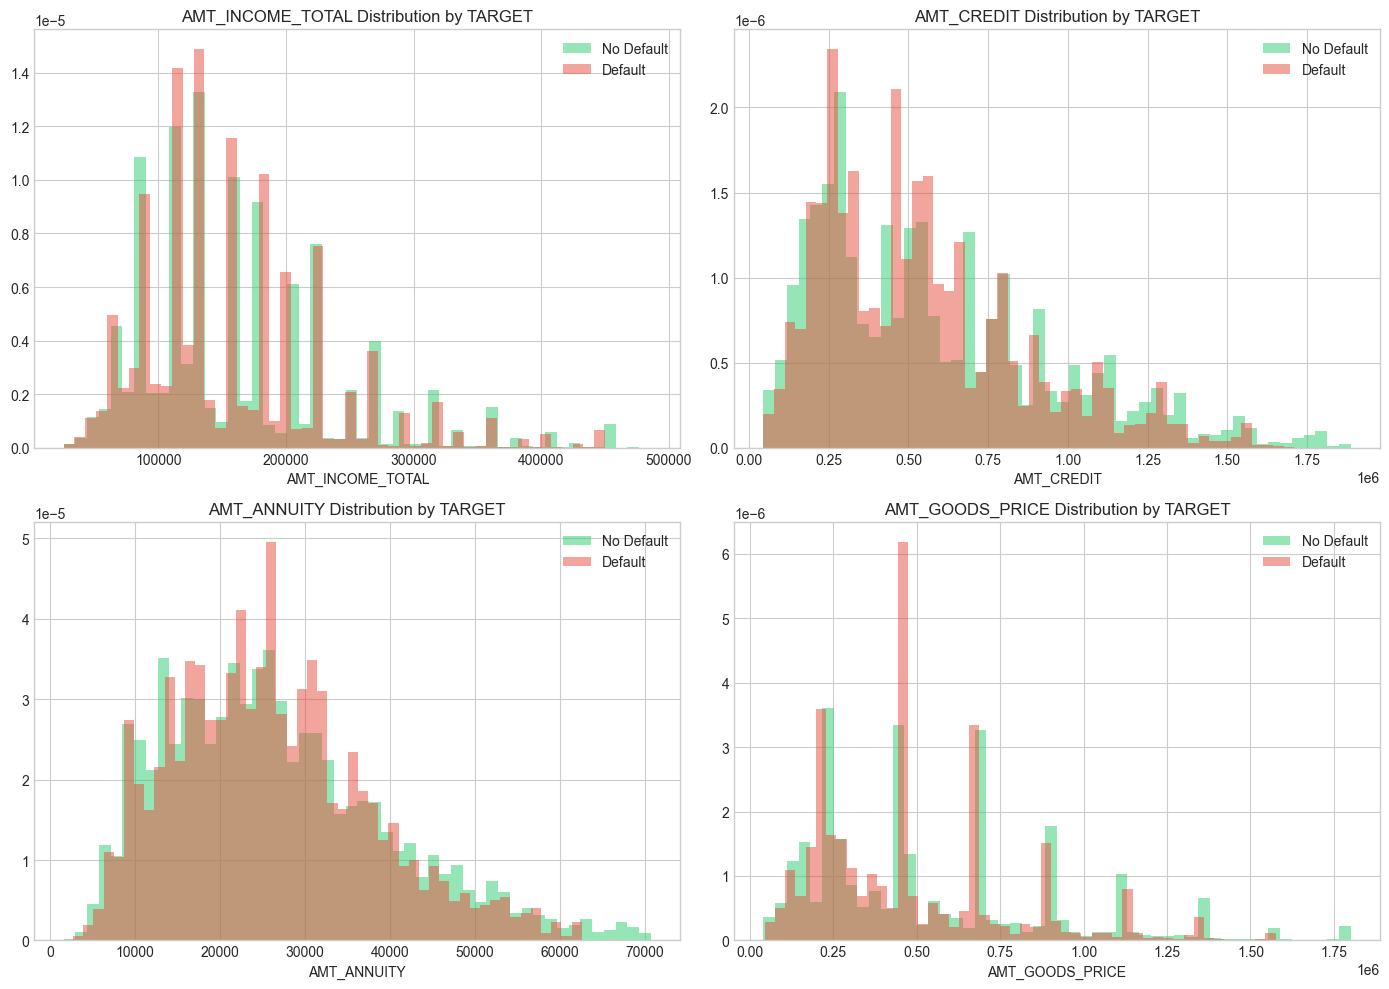

In [21]:
# Distribution of Key Numeric Features by TARGET
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, col in zip(axes.flatten(), ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']):
    for target in [0, 1]:
        subset = app_train[app_train['TARGET'] == target][col].dropna()
        # Limit to 99th percentile for better visualization
        subset = subset[subset <= subset.quantile(0.99)]
        label = 'No Default' if target == 0 else 'Default'
        color = '#2ecc71' if target == 0 else '#e74c3c'
        ax.hist(subset, bins=50, alpha=0.5, label=label, color=color, density=True)
    ax.set_title(f'{col} Distribution by TARGET', fontsize=12)
    ax.set_xlabel(col)
    ax.legend()

plt.tight_layout()
plt.show()

---
## 9. Summary & Key Findings





In [22]:
# สรุปข้อมูลเบื้องต้น
print("=" * 60)
print("EDA SUMMARY")
print("=" * 60)
print(f"Total Training Samples: {len(app_train):,}")
print(f"Total Features: {app_train.shape[1] - 2} (excluding SK_ID_CURR and TARGET)")
print(f"Numeric Features: {len(numeric_cols)}")
print(f"Categorical Features: {len(categorical_cols)}")
print(f"Columns with Missing Values: {len(missing_df)}")
print(f"Default Rate: {app_train['TARGET'].mean()*100:.2f}%")
print("=" * 60)

EDA SUMMARY
Total Training Samples: 307,511
Total Features: 120 (excluding SK_ID_CURR and TARGET)
Numeric Features: 106
Categorical Features: 16
Columns with Missing Values: 67
Default Rate: 8.07%
